## Combining Datasets

In this script we will combine the data gathered from the depreessive scrapping script with the data from the mostly non-depressive scripts,
analyse their target distribution, standardise their formats and then construct a final dataset containing all of them.

The data from the depressive script hsa been manually reviewed and annotated by several different team members, and then reviewwd one more
time by aonther member, to ensure consistency.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
os.chdir("/content/drive/MyDrive/2024/Depression data/depression-detection")

**1. Read in non-depressive dataset**

In [ ]:
df0 = pd.read_csv("/content/processed_data.csv",sep='\t', encoding='utf-8')

In [ ]:
df0.shape

(5970, 1)

In [ ]:
dfb=pd.read_csv("/content/drive/MyDrive/2024/Depression data/depression-detection/data/general_fb_post.csv")
dfb.shape

(2338, 6)

In [ ]:
pd.set_option('display.max_colwidth', 200)

**2. Briefly analyse their content**

In [ ]:

df0=df0.iloc[:,:2]

NameError: name 'df0' is not defined

In [ ]:
df0.head()

,"Unnamed: 0,text,target,clean_text"
0,"0,I miss my friends so badly 😢,1,miss friends ..."
1,"1,Can't believe I had 4 days off work and I'm ..."
2,"2,I just want soccer season baaaack???­???­???..."
3,"3,""@bolarotibi @jamesatye @jacksonhull @daniel..."
4,"4,""No matter how hard I try, I cannot force he..."


In [ ]:
df0.tail()

,"Unnamed: 0,text,target,clean_text"
5965,"2333,a eurovision song contest victory dedicat..."
5966,"2334,confused about the uk euref here is what ..."
5967,"2335,channing tatum is set to make some magic ..."
5968,"2336,trust us it was a nasty ordeal,1,trust us..."
5969,"2337,update todays suicide blast in pakistans ..."


<ipython-input-23-1ac4ffa48dcc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df0.label.unique(),y=df0.label.value_counts(), palette='Set2');


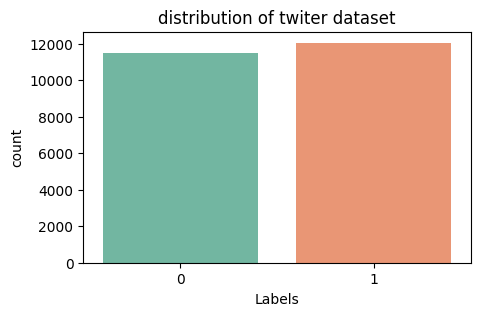

In [ ]:
fig = plt.figure(figsize=(5,3))
plt.title('distribution of twiter dataset')
ax = sns.barplot(x=df0.label.unique(),y=df0.label.value_counts(), palette='Set2');
ax.set(xlabel='Labels');

<ipython-input-22-d502faf07576>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=dfb.target.unique(),y=dfb.target.value_counts(), palette='Set2');


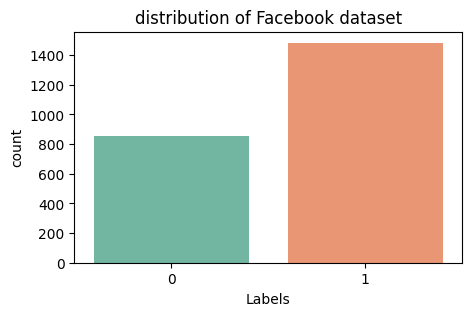

In [ ]:
fig = plt.figure(figsize=(5,3))
plt.title('distribution of Facebook dataset')
ax = sns.barplot(x=dfb.target.unique(),y=dfb.target.value_counts(), palette='Set2');
ax.set(xlabel='Labels');

In [ ]:
dfb.head()

,Unnamed: 0,ID,Post_text,Affect Dimension,Intensity Score,target
0,0,5550296508_10154703878911509,what started as a noise complaint on a residen...,sadness,-0.300000,1
1,1,228735667216_10153579205757217,it is said to be the largest airlift of its k...,joy,0.600000,0
2,2,5550296508_10154502423711509,active shooter is one of the worst calls a pol...,sadness,-0.422222,1
3,3,228735667216_10153570518887217,the thai woman wanted to keep the child after ...,joy,0.416667,0
4,4,228735667216_10153576993082217,at least seven people are known to have died\n...,sadness,-0.300000,1


**3. Standardise dataset format**

In [ ]:
df0 = df0[['text','label']].copy()
dfb = dfb[['Post_text','target']].copy()


In [ ]:
dfb = dfb.rename(columns = {'Post_text': "text",'target':'label'})

In [ ]:
twit_df_all = df0
twit_df_all = twit_df_all.sample(frac=1).reset_index(drop=True)
print(twit_df_all.shape)
twit_df_all.head(10)

(23520, 2)


,text,label
0,@Abeeliever Hi Sweetie! how r ya today? Hope a...,0
1,yay! Cookies from jab!,0
2,@ efpj SEE YOU ON THE 12TH!,0
3,this is how to show a loved one you care: How ...,1
4,- that explains alot.,0
5,@1achilles1 as long as your body continuously ...,0
6,Great insight: Survey from McKinsey- gen z mos...,1
7,Anticipatory grief is real and is something th...,1
8,"@3ND14P3 Well, I like the America Ferrera one....",0
9,You matter.\n\n#GetFranck #FranckApp #mentalhe...,1


In [ ]:
fb_df_all=dfb
print(fb_df_all.shape)
fb_df_all.head()

(2338, 2)


,text,label
0,what started as a noise complaint on a residen...,1
1,it is said to be the largest airlift of its k...,0
2,active shooter is one of the worst calls a pol...,1
3,the thai woman wanted to keep the child after ...,0
4,at least seven people are known to have died\n...,1


In [ ]:
df_all=pd.concat([twit_df_all,fb_df_all])

<ipython-input-41-29b2177340cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_all.label.unique(),y=df_all.label.value_counts(),palette='Set2');


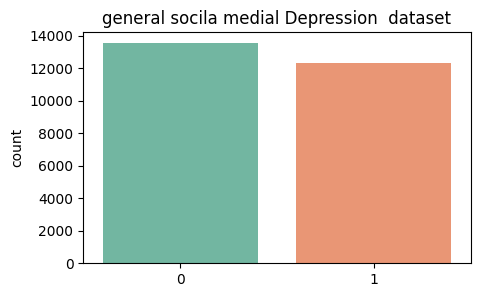

In [ ]:
fig = plt.figure(figsize=(5,3))
plt.title('general socila medial Depression  dataset')
sns.barplot(x=df_all.label.unique(),y=df_all.label.value_counts(),palette='Set2');


In [ ]:
fb_df_all.columns

Index(['Post_text', 'target'], dtype='object')

In [ ]:
df_all


,text,label
0,@Abeeliever Hi Sweetie! how r ya today? Hope a...,0
1,yay! Cookies from jab!,0
2,@ efpj SEE YOU ON THE 12TH!,0
3,this is how to show a loved one you care: How ...,1
4,- that explains alot.,0
...,...,...
2333,a eurovision song contest victory dedicated to...,1
2334,confused about the uk euref here is what vote ...,1
2335,channing tatum is set to make some magic in si...,0
2336,trust us it was a nasty ordeal,1


In [ ]:
df_all.to_csv("/content/drive/MyDrive/2024/Depression data/SocialMEdiDepress/data/processed/socialdepression.csv")

In [ ]:
df_all.label.value_counts()

NameError: name 'df_all' is not defined

In [ ]:
df_all.shape

(25858, 2)

## Conclusion:
Even though the target is not balanced as there are more non-depressive data, we believe it covers a good range of depressive and non-depressive tweets and would be a good basis for developing a depression detection classifier